In [1]:
from sklearn.datasets import make_classification,make_moons
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
N = 20

In [3]:
X,y = make_moons(n_samples=N,noise=0.5)

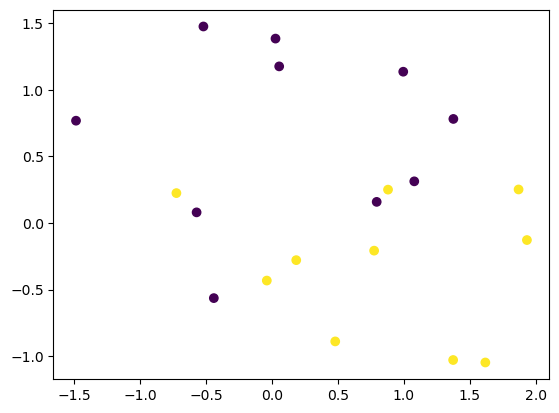

In [4]:
plt.scatter(X[:,0],X[:,1],c=y);

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
t_0 = DecisionTreeClassifier()
t_0.fit(X,y)

DecisionTreeClassifier()

In [7]:
def plot_decision_boundary(data,labels,clf):
    plot_step = 0.02
    x_min, x_max = data[:,0].min() -1, data[:,0].max() + 1
    y_min,y_max = data[:,1].min() -1 , data[:,1].max() + 1

    xx,yy = np.meshgrid(np.arange(x_min,x_max,plot_step),
                   np.arange(y_min,y_max,plot_step))
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx,yy,Z,cmap='cool')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Decision Boundary')

    plt.scatter(data[:,0],data[:,1],c=labels,cmap='hot',s=100)
    plt.show()

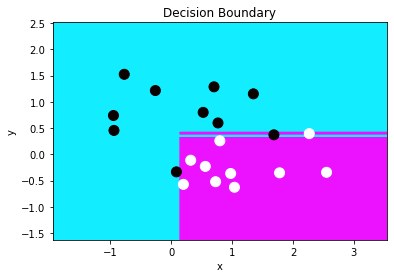

In [97]:
plot_decision_boundary(X,y,t_0)

In [8]:
def make_boot_strapped_tree():
    sample = np.random.choice(range(N),N)
    X_resampled = X[sample]
    y_resampled = y[sample]
    t = DecisionTreeClassifier()
    t.fit(X_resampled,y_resampled)
    return t

In [9]:
sample = np.random.choice(range(N),N)
X[sample]

array([[ 0.79405498,  0.15844875],
       [ 0.77463131, -0.20800151],
       [ 0.47961344, -0.88991193],
       [-0.44114953, -0.56455187],
       [ 0.47961344, -0.88991193],
       [ 1.07906951,  0.31278606],
       [ 0.77463131, -0.20800151],
       [ 0.88001294,  0.25036532],
       [-0.52013465,  1.47627311],
       [ 0.88001294,  0.25036532],
       [-0.44114953, -0.56455187],
       [ 1.37559923,  0.78158803],
       [ 1.37387807, -1.02964235],
       [ 0.18387199, -0.27927254],
       [ 1.07906951,  0.31278606],
       [ 0.88001294,  0.25036532],
       [-0.72500744,  0.22443027],
       [-0.44114953, -0.56455187],
       [ 1.93351302, -0.12826233],
       [-0.44114953, -0.56455187]])

In [10]:
np.random.choice(range(N),N)

array([ 3, 16,  9, 13, 12,  1, 18, 14, 12,  5,  1, 18, 10, 16, 18, 11, 19,
       12,  3,  8])

In [11]:
t = make_boot_strapped_tree()

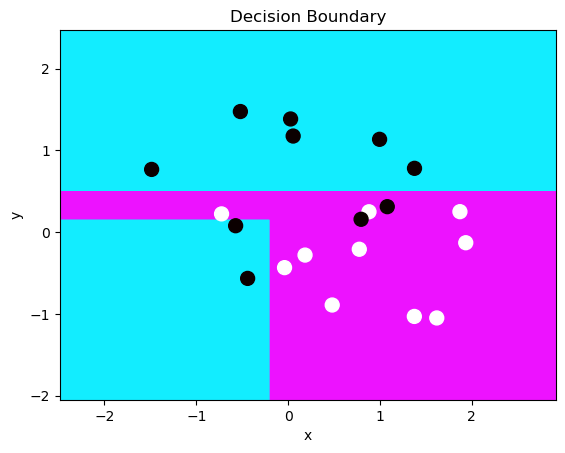

In [12]:
plot_decision_boundary(X,y,t)

In [13]:
class bt_clf():
    
    def __init__(self,T):
        self.T = T
        
    def predict(self,X):
        p = np.array([t.predict(X) for t in self.T])
        return np.array([Counter(p_).most_common(1)[0][0] for p_ in p.T])


In [14]:
T = [make_boot_strapped_tree() for _ in range(50)]

In [15]:
b = bt_clf(T)

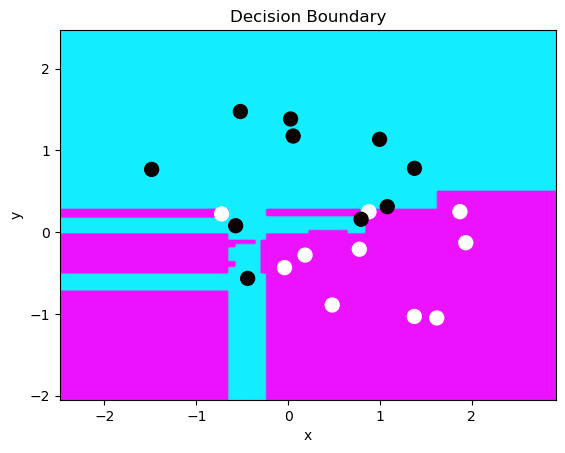

In [16]:
plot_decision_boundary(X,y,b)

In [17]:
from sklearn.ensemble import BaggingClassifier

In [18]:
bt = BaggingClassifier(t_0,n_estimators=50)

In [19]:
bt.fit(X,y)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50)

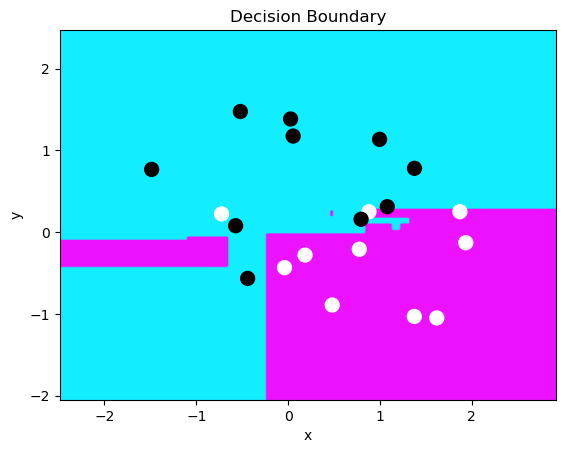

In [20]:
plot_decision_boundary(X,y,bt)

In [21]:
t = make_boot_strapped_tree()

In [22]:
import graphviz
from sklearn import tree

In [23]:
dot_data = tree.export_graphviz(t,out_file=None)
graph = graphviz.Source(dot_data)
graph.render('tree_3')

'tree_3.pdf'

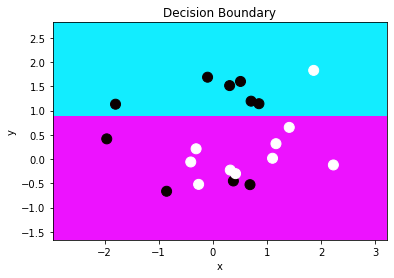

In [89]:
plot_decision_boundary(X,y,t)

In [24]:
def make_boot_strapped_tree_and_samples():
    sample = np.random.choice(range(N),N)
    X_resampled = X[sample]
    y_resampled = y[sample]
    t = DecisionTreeClassifier()
    t.fit(X_resampled,y_resampled)
    return t, sample

In [25]:
 S = np.array([make_boot_strapped_tree_and_samples() for _ in range(5)],dtype=object)

In [26]:
samples = S[:,1]

In [27]:
samples

array([array([ 6,  2,  8,  5,  0,  2,  4, 19,  6, 18,  7,  2, 19,  0, 12, 18, 17,
               3,  4, 10])                                                       ,
       array([10,  5, 15, 14, 10,  4,  7, 13,  4, 19, 18,  2,  9,  2, 10,  1, 12,
              11,  9,  4])                                                       ,
       array([ 9, 15, 18, 13,  4, 15,  3,  8,  3, 12, 15,  0,  5,  6,  5, 13,  0,
               0, 17,  6])                                                       ,
       array([ 4,  1,  6, 16,  1, 10, 15,  2,  9,  9, 13, 18, 13,  2, 13, 17,  6,
               0, 15,  0])                                                       ,
       array([11, 14,  1,  2,  2, 17, 13,  4, 16, 17, 10,  0,  5,  8,  4, 11, 11,
              15,  7,  7])                                                       ],
      dtype=object)

In [28]:
predictions = []
for i in range(N):
    for j in range(5):
        if i not in S[:,1][j]:
            predictions.append([i,j,S[:,0][j].predict([X[i]]).item(),y[i]])            

In [30]:
predictions = np.array(predictions)

In [31]:
predictions

array([[ 0,  1,  1,  1],
       [ 1,  0,  1,  1],
       [ 1,  2,  1,  1],
       [ 2,  2,  0,  0],
       [ 3,  1,  1,  1],
       [ 3,  3,  1,  1],
       [ 3,  4,  1,  1],
       [ 5,  3,  1,  1],
       [ 6,  1,  0,  0],
       [ 6,  4,  0,  0],
       [ 7,  2,  0,  1],
       [ 7,  3,  0,  1],
       [ 8,  1,  0,  0],
       [ 8,  3,  0,  0],
       [ 9,  0,  0,  0],
       [ 9,  4,  0,  0],
       [10,  2,  1,  1],
       [11,  0,  1,  1],
       [11,  2,  1,  1],
       [11,  3,  0,  1],
       [12,  3,  0,  1],
       [12,  4,  1,  1],
       [13,  0,  1,  0],
       [14,  0,  0,  0],
       [14,  2,  0,  0],
       [14,  3,  0,  0],
       [15,  0,  1,  0],
       [16,  0,  0,  0],
       [16,  1,  0,  0],
       [16,  2,  1,  0],
       [17,  1,  0,  0],
       [18,  4,  1,  0],
       [19,  2,  0,  1],
       [19,  3,  0,  1],
       [19,  4,  1,  1]], dtype=int64)

In [32]:
correct_pred = predictions[[i for i in range(len(predictions)) if predictions[i][2] == predictions[i][3]]]

In [33]:
oob_score = 0.0
for i in range(N):
    pred_i = predictions[predictions[:,0] == i]
    n = len(pred_i)

    m = len(pred_i[pred_i[:,2] == pred_i[:,3]])
    if n != 0:
        oob_score+=m/(n*N)
    


In [34]:
oob_score

0.6583333333333334

In [35]:
[[S[i,0].predict(X) for i in range(5)][j][k] for j in range(5) for k in range(20)] 

[1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1]

In [36]:
d1 = X[np.random.choice(range(N),N)]

In [37]:
d1

array([[ 0.05455273,  1.17646558],
       [-0.44114953, -0.56455187],
       [-0.52013465,  1.47627311],
       [ 0.79405498,  0.15844875],
       [ 0.88001294,  0.25036532],
       [ 1.61807153, -1.04819059],
       [ 1.61807153, -1.04819059],
       [ 0.47961344, -0.88991193],
       [ 1.37387807, -1.02964235],
       [-0.57184257,  0.0796771 ],
       [ 1.37387807, -1.02964235],
       [-0.44114953, -0.56455187],
       [ 1.61807153, -1.04819059],
       [ 1.37559923,  0.78158803],
       [ 0.0266185 ,  1.3852888 ],
       [-0.52013465,  1.47627311],
       [ 0.18387199, -0.27927254],
       [-0.72500744,  0.22443027],
       [ 0.0266185 ,  1.3852888 ],
       [-0.72500744,  0.22443027]])

In [38]:
def make_bootstrap_sample():
    sample = np.random.choice(range(N),N)
    X_resampled = X[sample]
    y_resampled = y[sample]
    return [(x,y) for x,y in zip(X_resampled,y_resampled)]

In [39]:
bootstrap_sample = make_bootstrap_sample()

In [40]:
depth = 3

In [41]:
features = np.random.choice([0,1],depth)

In [42]:
features

array([1, 0, 0])

In [43]:
def gini_index(nd):
    label_0 = [x for x in nd if x[1]==0]
    label_1 = [ x for x in nd if x[1] == 1]
    m = len(nd)
    m_0 = len(label_0)
    m_1 = len(label_1)
    return 2 * (m_0/m) * (m_1/m)
    

In [44]:
gini_index(bootstrap_sample)

0.375

In [45]:
def split_gini_index(split,node):
    L = [ x for x in node if x[0][split[0]] >= split[1]]
    R = [ x for x in node if x[0][split[0]] < split[1]]
    if len(L) == 0 or len(R) == 0:
        return 0
    else:
        return (len(L)/len(node))*gini_index(L) + (len(R)/len(node))*gini_index(R)

In [46]:
splits = [[1,x[0][1]] for x in bootstrap_sample]

In [47]:
splits

[[1, -0.8899119258488847],
 [1, 0.0796770957312308],
 [1, 1.176465578124118],
 [1, 1.1364048244434926],
 [1, -0.4327422338738428],
 [1, 0.22443027299798757],
 [1, 1.1364048244434926],
 [1, 0.1584487486966381],
 [1, 0.22443027299798757],
 [1, 1.1364048244434926],
 [1, 1.1364048244434926],
 [1, 1.176465578124118],
 [1, 1.176465578124118],
 [1, 1.4762731146697106],
 [1, 1.176465578124118],
 [1, -1.0296423523521763],
 [1, -0.5645518687267976],
 [1, -0.5645518687267976],
 [1, -0.5645518687267976],
 [1, 0.0796770957312308]]

In [48]:
for split in splits:
    gi = []
    gi.append(split_gini_index(split,bootstrap_sample))
min(gi)

0.3214285714285714

In [49]:
splits[1]

[1, 0.0796770957312308]